# ShuffleNet: An Extremely Efficient Convolutional Neural Network for Mobile Devices
----


## Abstract
---
* 계산량이 매우 제한된(모바일) 기기에서 작동하기 위해 고안된 모델.
* Pointwise group convolution 와 channel shuffle 2가지 새로운 연산 
    * 계산량 감소 및 높은 정확도.
* 결과적으로 ARM기반의 모바일 장치에서 AlexNet과 비슷한 정확도를 유지하면서 13배 빠른 속도로 계산 가능.

## Introduce
---
* 목표 : 제한된 계산량(수십 또는 수백 MFLOPs)에서 최고의 정확도를 추구.
* 이전까지는 '기본'네트워크 아키텍처를 가지고 가지치기, 압축, 또는 저비트 표현(ex. Quantization(양자화 32bit(f) -> 8bit(i)))에 집중.
* 최첨단 기본 아키텍쳐인 Xception(inception의 발전버전_[링크](https://ieeexplore.ieee.org/document/8099678))과 ResNeXt(ResNet 발전버전_[링크](https://arxiv.org/abs/1611.05431))에서는 밀집된 1x1 convolution 연산 때문에 효율성이 떨어진다는 것을 확인(계산량이 많아짐).
* 이를 해결하기 위해 Pointwise group convolution 등장.
* Group convolution을 부작용을 해결하기 위해 Shuffle 연산을 함.

### Pointwise group convolution & Chanel Shuffle
---
* Group convolution은 Alexnet에서 등장해서 ResNeXt에서 효율성이 증명됨.
* Depthwise seperable convolution은 Xception에서 등장해서 MoblieNet에서 효율성이 증명됨.
* 본 논문에서 이 두가지를 새로운 형태로 일반화함.

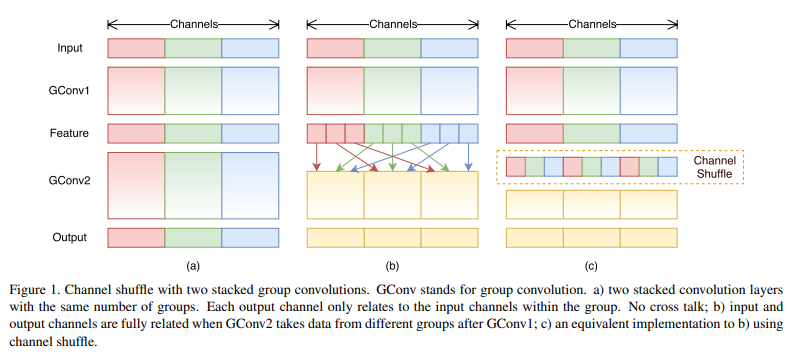

* a : Group convolution으로 input을 각 group으로 나누고 나눠진 group마다 convolution을 진행.
    * 이러한 경우. 나눠진 그룹에 해당하는 것만 학습.(독립적인 Network를 학습하는 결과.)
* b & c : Channel Shuffle을 진행.  결과적으로 모든 입력 그룹에 해당하는 정보를 활용하여 출력값을 생성.


### ShuffleNet Unit
---
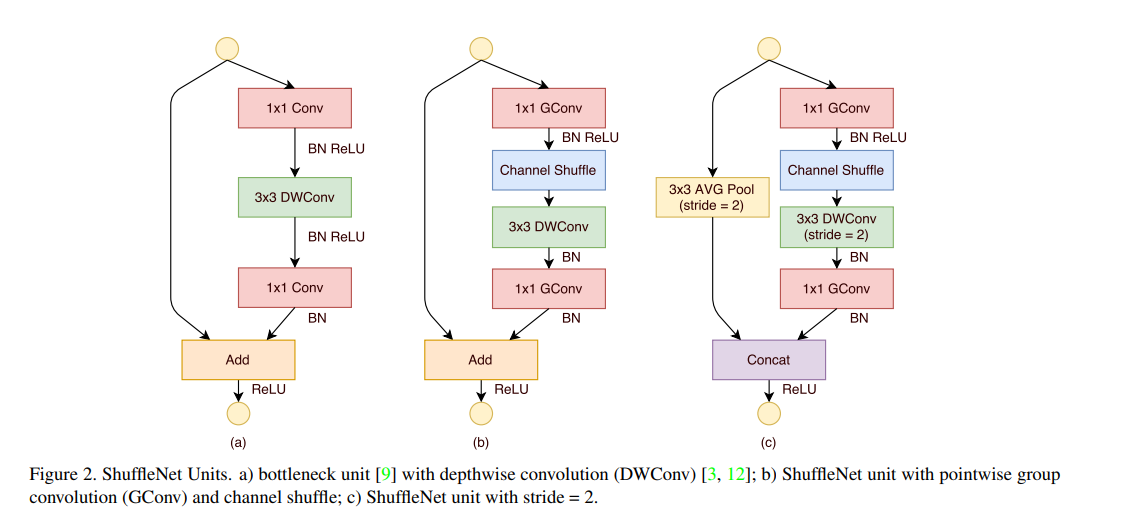
* Shufflenet은 동일한 구조의 ShuffleNet Unit을 쌓아서 구성한 모델로.
* a는 Depthwise Convolution을 사용하는 BottleNeck구조이고,
* b와 c는 ShuffleNet에서 사용하는 구조, C는 downsampling 시 사용(Stride = 2)
    * a와는 다르게 1x1 global convolution 연산
    * c에서는 shorcut에 3x3 average pooling을 추가 concat 연산을 통해 추가적인 계산량없이 채널 확장이 가능.
* 계산량 비교  
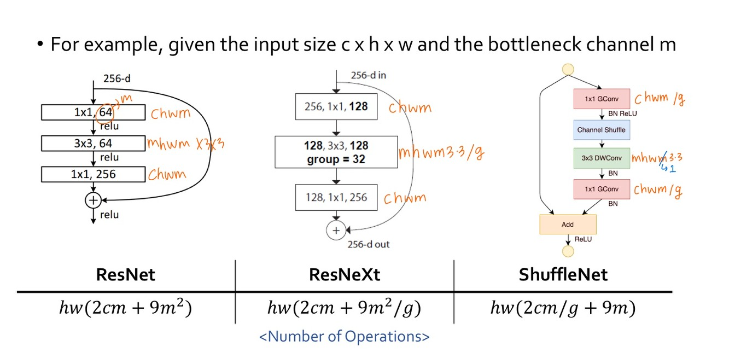

### ShuffleNet Architecture
---
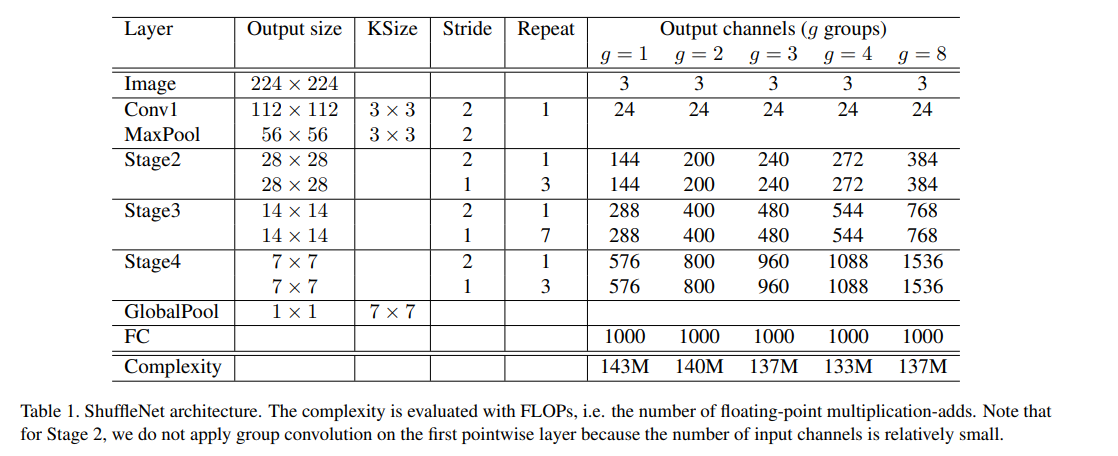
* 세단계의 Stage로 구성되어있음.
* 다양한 Output 채널을 가질수 있으며, 계산량 차이가 거의 없음.
    * Output의 채널수가 많을수록 많은 Group으로 나누어서 진행.

### Result
---
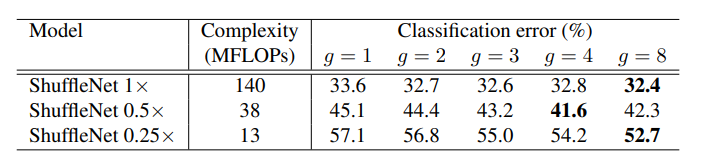  
* 1x, 0.5x, 0.25x는 Filter(Channel)의 수를 Scaling한 것.
* 대략적으로 계산량은 scaling 한것의 두배 만큼 감소.


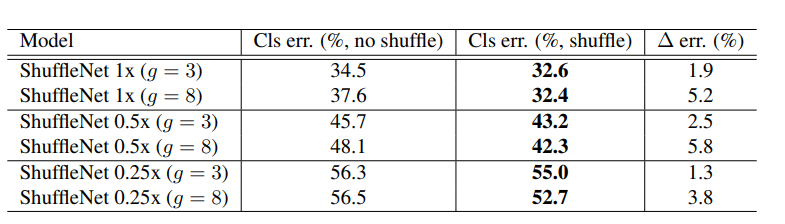  
* g가 낮을수록 정확.


* 다른 모델들과의 비교.    

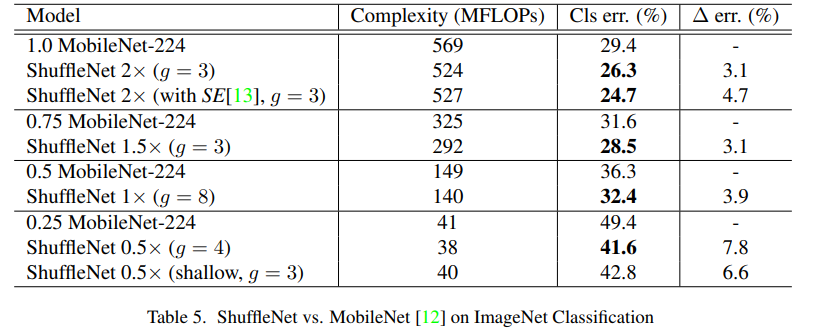  


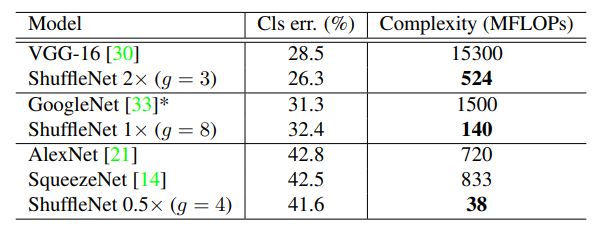

## 참고
---
* ARM 아키텍처:
    * 보다 더 작은 크기로 비용 감소, 전력 소비 감소, 열 발생 감소, 빠른 속도, 증가된 배터리 수명을 위해서 설계됨.
    * 스마트폰과 같은 소형 모바일 기기 및 노트북에서 사용됨.

